In [86]:
import pandas as pd
import numpy as np
import os
import seaborn as sb
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image_dataset_from_directory
import tensorflow_datasets as tfds

In [32]:
df_eda = pd.DataFrame()

classes = []
train_image_number_breakdown = {}
test_image_number_breakdown = {}
number_test_images = 0
number_train_images = 0
for class_name in os.listdir("data/Train"):
    classes.append(class_name)
    path = os.path.join("data/Train",class_name)
    count = len([entry for entry in os.listdir(path) if os.path.isfile(os.path.join(path, entry))]) 
    train_image_number_breakdown[class_name] = count
    number_train_images += count


for class_name in os.listdir("data/Test"):
    classes.append(class_name)
    path = os.path.join("data/Test",class_name)
    count = len([entry for entry in os.listdir(path) if os.path.isfile(os.path.join(path, entry))]) 
    test_image_number_breakdown[class_name] = count
    number_test_images += count

classes = list(set(classes))

In [33]:
print("Number of Train Images {}".format(number_train_images))
print("Number of Test Images {}".format(number_test_images))
print("##"*25)
print("Train Images Breakdown {}".format(train_image_number_breakdown))
print("__"*25)
print("Test Images Breakdown {}".format(test_image_number_breakdown))
print("##"*25)
print("Classes {}".format(classes))

Number of Train Images 2239
Number of Test Images 118
##################################################
Train Images Breakdown {'actinic keratosis': 114, 'basal cell carcinoma': 376, 'dermatofibroma': 95, 'melanoma': 438, 'nevus': 357, 'pigmented benign keratosis': 462, 'seborrheic keratosis': 77, 'squamous cell carcinoma': 181, 'vascular lesion': 139}
__________________________________________________
Test Images Breakdown {'actinic keratosis': 16, 'basal cell carcinoma': 16, 'dermatofibroma': 16, 'melanoma': 16, 'nevus': 16, 'pigmented benign keratosis': 16, 'seborrheic keratosis': 3, 'squamous cell carcinoma': 16, 'vascular lesion': 3}
##################################################
Classes ['nevus', 'pigmented benign keratosis', 'melanoma', 'actinic keratosis', 'seborrheic keratosis', 'squamous cell carcinoma', 'basal cell carcinoma', 'vascular lesion', 'dermatofibroma']


In [34]:
cant_tot = {}
for i in classes:
    cant_tot[i] = train_image_number_breakdown[i] + test_image_number_breakdown[i]
    print(i)

nevus
pigmented benign keratosis
melanoma
actinic keratosis
seborrheic keratosis
squamous cell carcinoma
basal cell carcinoma
vascular lesion
dermatofibroma


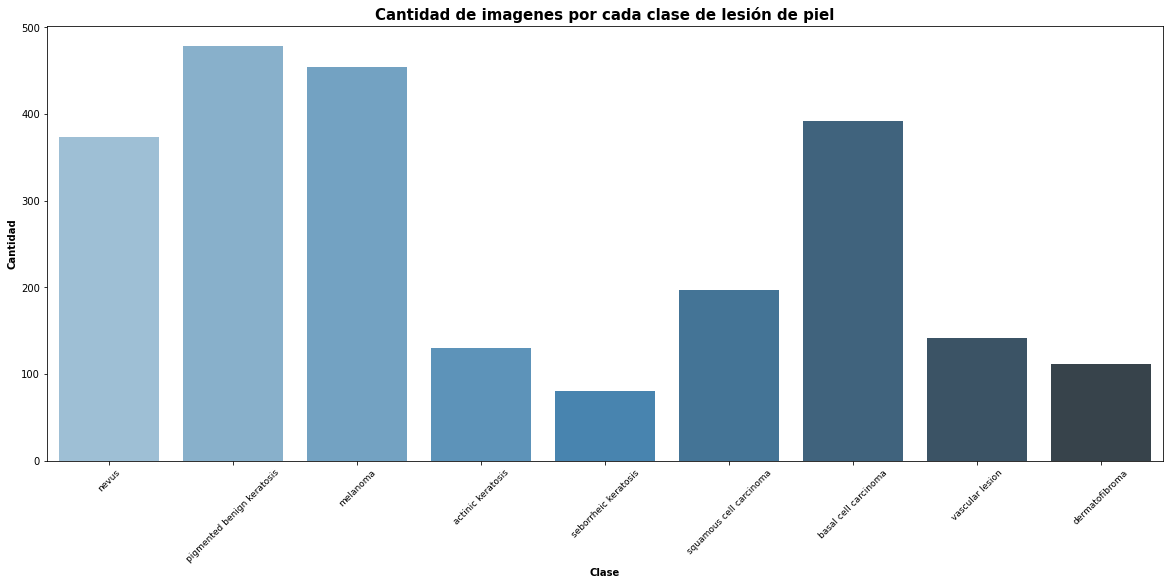

In [237]:
names = list(cant_tot.keys())
values = list(cant_tot.values())

plt.figure(figsize = (20, 8))
# plt.bar(range(len(cant_tot)), values, tick_label=names)
ax = sb.barplot(x=names, y=values, palette='Blues_d')
plt.xticks(fontsize=9, rotation=45)
plt.xlabel('Clase', fontweight='bold')
plt.ylabel('Cantidad', fontweight='bold')
plt.title('Cantidad de imagenes por cada clase de lesión de piel', fontsize=15, fontweight='bold')
plt.savefig('Cantidad_fotos_por_tipo.png', bbox_inches='tight')
plt.show()

In [144]:
alto = 150
ancho = 150

# df_Train = image_dataset_from_directory('data/Train/', seed = 1234, image_size=(alto, ancho), label_mode = 'categorical', validation_split = 0.2, subset = 'training', batch_size=1) 
# df_Test = image_dataset_from_directory('data/Train/', seed = 1234, image_size=(alto, ancho), label_mode = 'categorical', validation_split = 0.2, subset = 'validation', batch_size=1) 

df_Train = image_dataset_from_directory('data/Train/', seed = 1234, image_size=(alto, ancho), validation_split = 0.2, subset = 'training', batch_size=1) 
df_Test = image_dataset_from_directory('data/Train/', seed = 1234, image_size=(alto, ancho), validation_split = 0.2, subset = 'validation', batch_size=1) 
#                                         seed = 123
#                                         image_size=(img_height, img_width), 
#                                         validation_split=0.2, 
#                                         subset='training')

Found 2239 files belonging to 9 classes.
Using 1792 files for training.
Found 2239 files belonging to 9 classes.
Using 447 files for validation.


In [147]:
X_Train = []
y_Train = []

for image, label in tfds.as_numpy(df_Train):
#     print(type(image), type(label), label, len(label))
    X_Train.append(image.reshape(1, (150*150*3)))
    y_Train.append(label)

In [124]:
len(X_Train)

1792

In [148]:
X_Train_df = pd.DataFrame(np.concatenate(X_Train))

In [149]:
y_Train_df = pd.DataFrame(np.concatenate(y_Train))

In [150]:
X_Train_df.shape

(1792, 67500)

In [151]:
y_Train_df

,0
0,5
1,1
2,3
3,3
4,1
...,...
1787,4
1788,4
1789,1
1790,5


In [127]:
X_Train_df.head()

,0,1,2,3,4,5,6,7,8,9,...,67490,67491,67492,67493,67494,67495,67496,67497,67498,67499
0,203.500000,140.000000,144.5,213.500000,157.500000,163.500000,211.500000,160.000000,169.500000,216.500000,...,142.000000,214.000000,155.500000,141.500000,212.00000,149.50000,134.500000,213.500000,152.500000,141.500000
1,223.059998,167.940002,148.0,221.175598,166.955597,145.695602,221.145996,166.026001,145.085999,222.036392,...,190.333313,245.626648,194.446655,193.506653,245.73999,191.13118,191.524384,241.940002,185.940002,186.820007
2,130.500000,84.500000,72.0,137.500000,95.500000,77.500000,146.500000,100.000000,83.500000,149.000000,...,114.500000,175.500000,134.500000,116.500000,169.00000,127.00000,109.500000,163.000000,122.000000,106.000000
3,214.500000,175.000000,176.5,208.500000,165.500000,165.500000,211.000000,168.500000,168.000000,215.500000,...,181.500000,205.500000,175.500000,180.000000,203.50000,177.00000,180.000000,206.500000,174.500000,178.500000
4,148.500000,93.000000,89.0,150.500000,104.000000,102.500000,157.000000,112.500000,109.500000,157.500000,...,154.000000,185.500000,148.000000,151.500000,182.50000,145.00000,149.500000,181.500000,145.500000,148.500000


In [152]:
# min(X_Train_df)
# max(X_Train_df)
print('Valor mínimo de los pixeles: ', min(X_Train_df.min()))
print('Valor máximo de los pixeles: ', max(X_Train_df.max()))

Valor mínimo de los pixeles:  0.0
Valor máximo de los pixeles:  255.0


In [153]:
X_Train_df = X_Train_df/255

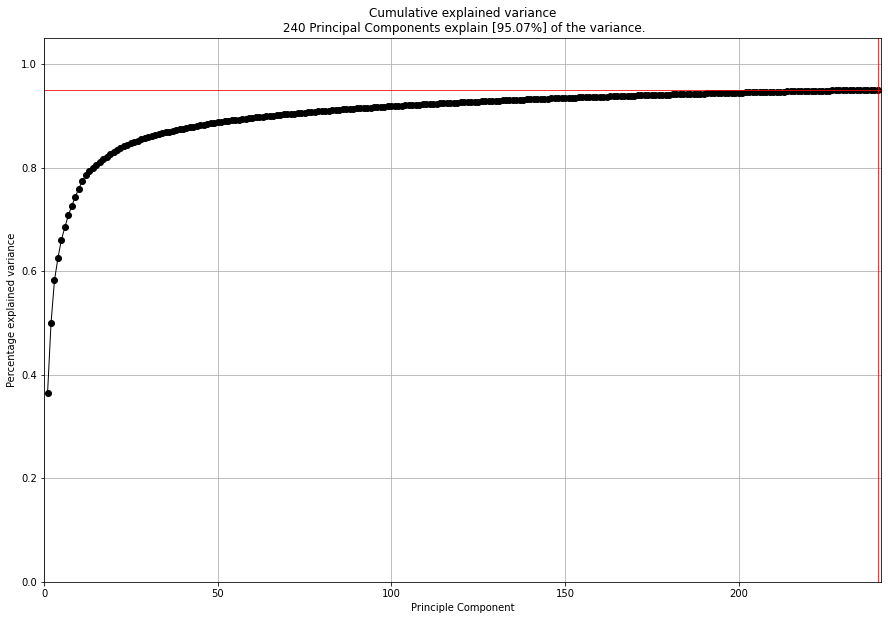

<Figure size 432x288 with 0 Axes>

In [241]:
from pca import pca
model = pca(240,normalize=True,verbose=True)
results = model.fit_transform(X_Train_df)

# Gráfica
fig, ax = model.plot()
fig.savefig('Varianza_explicada.png', bbox_inches='tight')

In [192]:
df_Train.class_names

['actinic keratosis',
 'basal cell carcinoma',
 'dermatofibroma',
 'melanoma',
 'nevus',
 'pigmented benign keratosis',
 'seborrheic keratosis',
 'squamous cell carcinoma',
 'vascular lesion']

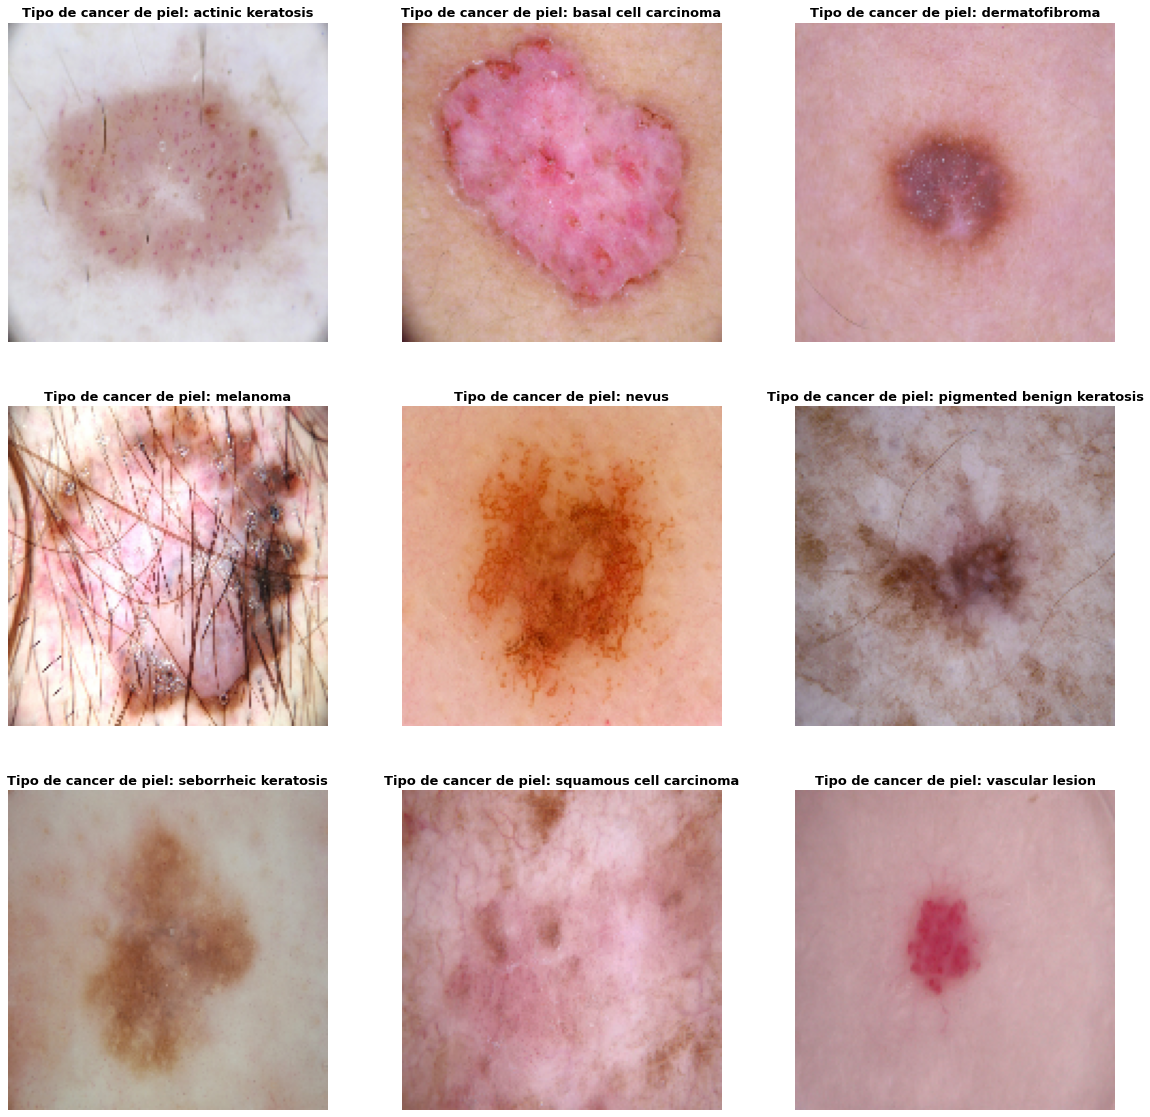

In [236]:
plt.figure(figsize=(20, 20))
for j in range(9):
    i = y_Train_df[y_Train_df[0]==j].head(1).index[0]
    plt.subplot(3, 3, j + 1)
    plt.imshow(np.array(X_Train_df.iloc[i]).reshape(150,150,3))
    tipo = df_Train.class_names[y_Train_df.iloc[i].values[0]]
    plt.title('Tipo de cancer de piel: ' + str(tipo), fontsize=13, fontweight='bold')
    plt.axis("off")
#     print(i)

plt.savefig('Ejemplo_fotos_por_tipo.png', bbox_inches='tight')
plt.show()

In [204]:
from sklearn.cluster import AgglomerativeClustering

cluster_sk = AgglomerativeClustering(n_clusters=9, affinity='euclidean', linkage='ward')
cluster_sk =cluster_sk.fit_predict(X_Train_df)

[Text(0.5, 66.80555555555556, 'Cluster'),
 Text(110.55555555555556, 0.5, 'Reales')]

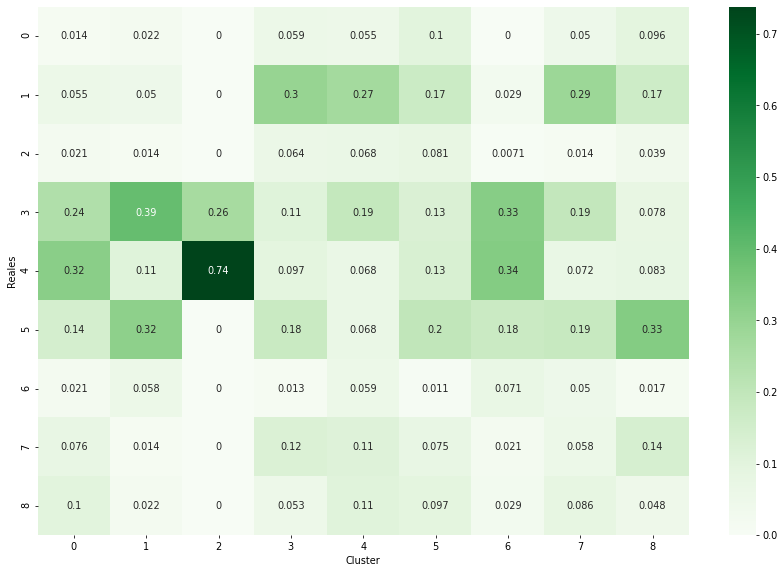

In [214]:
from sklearn.metrics import confusion_matrix

cf_matrix = confusion_matrix(y_Train_df, cluster_sk)

fig = plt.figure(figsize = (15, 10), dpi = 70)
s = sb.heatmap(cf_matrix/np.sum(cf_matrix, axis = 0), annot=True, vmin=0, cmap="Greens")
s.set(xlabel='Cluster', ylabel='Reales')